In [1]:
import gym
import sys
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.logger import Logger, HumanOutputFormat
from stable_baselines3.common.evaluation import evaluate_policy
from Fire_Fighter_Env import FireFighterEnv  

In [ ]:
class DummyLogger(Logger):
    def __init__(self):
        super().__init__(None, [HumanOutputFormat(sys.stdout)])


env = FireFighterEnv(size=9, fire_spawn_delay=10, max_steps=200)

model = DQN(
    'MlpPolicy', 
    env, 
    verbose=0, 
    learning_rate=0.001,  
    gamma=0.99, 
    buffer_size=50000,  
    target_update_interval=200,  
    train_freq=32,  
    batch_size=32, 
)

model._logger = DummyLogger()


C:\Users\Hareedy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [3]:
import numpy as np

rewards_per_episode = []
loss_per_episode = []
best_total_reward = -np.inf  

num_episodes = 100
epsilon = 1.0  # initial epsilon (start with high exploration)
epsilon_min = 0.02  # minimum epsilon (end with minimal exploration)
epsilon_decay = 0.995  # decay rate of epsilon (controls how quickly exploration reduces)

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    total_loss = 0
    done = False

    while not done:
        # Epsilon-Greedy approach: choose either exploration or exploitation
        if np.random.rand() < epsilon:
            # Explore: pick a random action
            action = env.action_space.sample()
        else:
            # Exploit: use the model to predict the best action
            action, _ = model.predict(state, deterministic=True)
            action = int(action.item())
        
        # Take action in the environment
        next_state, reward, done, _ = env.step(action)

        # Store transition in the replay buffer
        action = np.array([action])
        model.replay_buffer.add(state, next_state, action, reward, done, [_])
        # Move to the next state
        state = next_state

        # Accumulate reward
        total_reward += reward

        # Train the model after each step if there's enough data in the buffer
        if model.replay_buffer.size() > model.batch_size:
            loss = model.train(gradient_steps=1, batch_size=32)
            total_loss = loss.get("loss", 0) if loss is not None else 0
        else:
            total_loss = 0

    # Store episode metrics
    rewards_per_episode.append(total_reward)
    loss_per_episode.append(total_loss)

    # Save best model if this episode has the best total reward so far
    if total_reward > best_total_reward:
        best_total_reward = total_reward
        model.save("best_dqn_firefighter")
        print(" New best model saved!")

    # Decay epsilon to reduce exploration over time
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    # Logging
    print(f"Episode {episode}, Reward: {total_reward}, Loss: {total_loss}, Epsilon: {epsilon:.4f}")


 New best model saved!
Episode 0, Reward: -888, Loss: 0, Epsilon: 0.9950
 New best model saved!
Episode 1, Reward: -630, Loss: 0, Epsilon: 0.9900
 New best model saved!
Episode 2, Reward: -499, Loss: 0, Epsilon: 0.9851
Episode 3, Reward: -776, Loss: 0, Epsilon: 0.9801
Episode 4, Reward: -1102, Loss: 0, Epsilon: 0.9752
Episode 5, Reward: -915, Loss: 0, Epsilon: 0.9704
Episode 6, Reward: -989, Loss: 0, Epsilon: 0.9655
Episode 7, Reward: -1085, Loss: 0, Epsilon: 0.9607
Episode 8, Reward: -562, Loss: 0, Epsilon: 0.9559
Episode 9, Reward: -980, Loss: 0, Epsilon: 0.9511
Episode 10, Reward: -592, Loss: 0, Epsilon: 0.9464
Episode 11, Reward: -1082, Loss: 0, Epsilon: 0.9416
Episode 12, Reward: -1121, Loss: 0, Epsilon: 0.9369
Episode 13, Reward: -1064, Loss: 0, Epsilon: 0.9322
Episode 14, Reward: -908, Loss: 0, Epsilon: 0.9276
Episode 15, Reward: -1074, Loss: 0, Epsilon: 0.9229
Episode 16, Reward: -685, Loss: 0, Epsilon: 0.9183
Episode 17, Reward: -1103, Loss: 0, Epsilon: 0.9137
Episode 18, Rewa

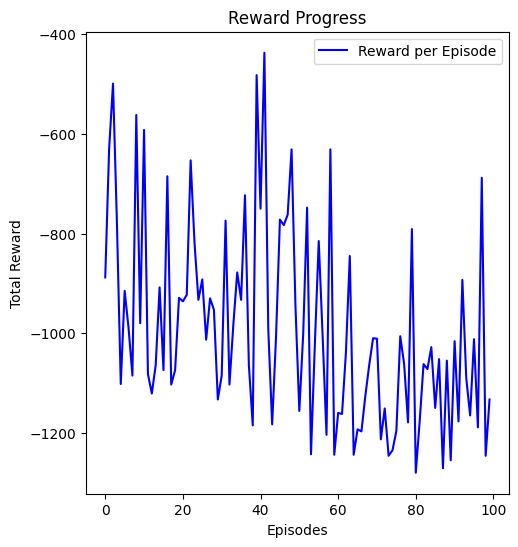

Mean reward: -1476.75 +/- 103.22


In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(rewards_per_episode, label="Reward per Episode", color="blue")
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Reward Progress")
plt.legend()


plt.show()

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

model.save("final_dqn_firefighter")


In [ ]:
# model = DQN.load("best_dqn_firefighter", env=env)